# Support Vector Machines

In [1]:
import pandas as pd

df = pd.read_csv("data/wine_quality.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [2]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [3]:
df = df.dropna()

In [4]:
df["quality"].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

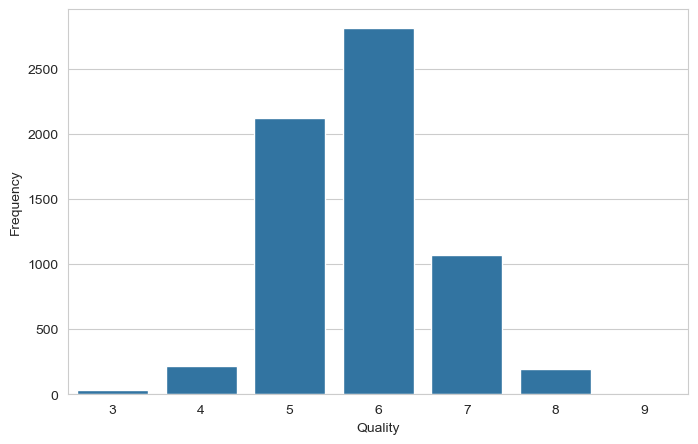

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x=df["quality"])
plt.xlabel("Quality")
plt.ylabel("Frequency")
# plt.title("Wine quality classes")
plt.show()

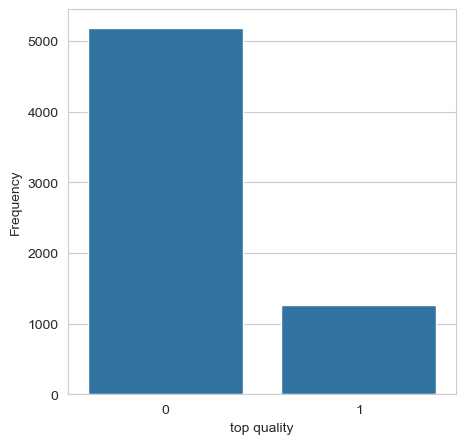

In [6]:
# encode label

df["top quality"] = [1 if x > 6 else 0 for x in df["quality"]]
del df["quality"]

y = df["top quality"]

plt.figure(figsize=(5, 5))
sns.countplot(x=y)
plt.xlabel("top quality")
plt.ylabel("Frequency")
plt.show()

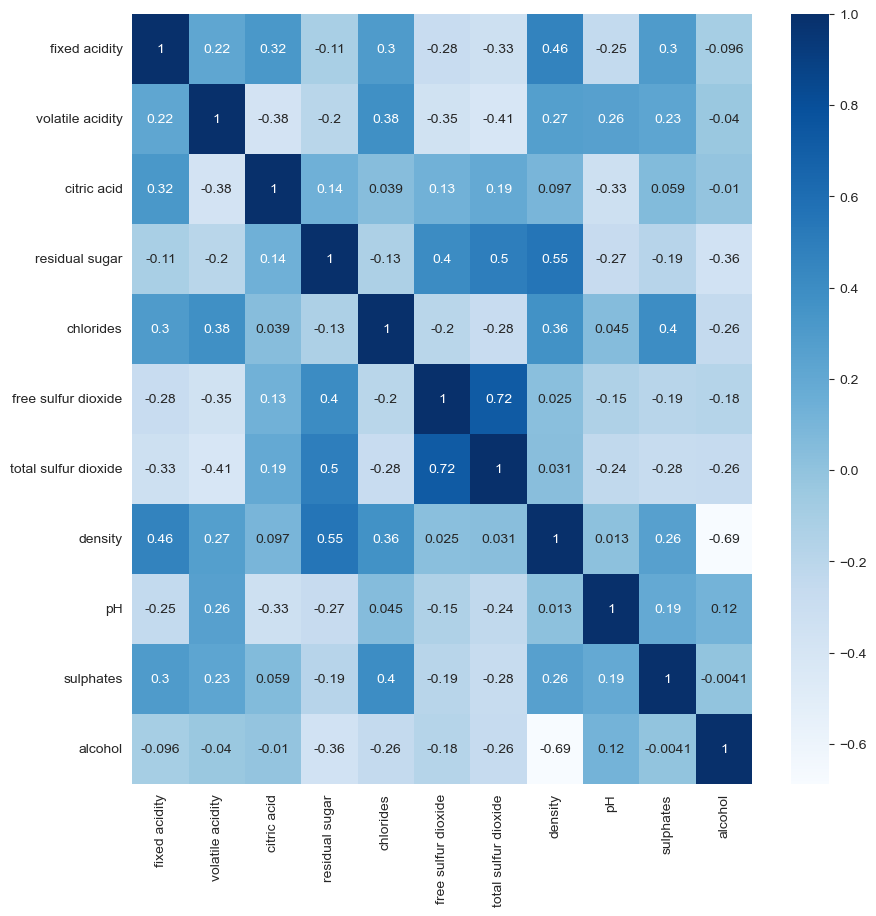

In [7]:
plt.figure(figsize=(10, 10))
corr = df.iloc[:, 1:12].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

In [8]:
# perform one-hot encoding to the categorical features
df_features = pd.get_dummies(df.iloc[:, :-1], drop_first=True, dtype="int8")
df_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [9]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_white            6463 non-null   int8   
dtypes: float64(11), int8(1)
memory usage: 612.2 KB


In [10]:
# perform z-score normalisation to the rest of numerical features
from sklearn.preprocessing import StandardScaler

x = df_features.to_numpy()
x[:, :11] = StandardScaler().fit_transform(x[:, :11])
print(x)

[[-0.16778609 -0.42270958  0.2839587  ... -0.5449872  -1.41892232
   1.        ]
 [-0.70715516 -0.2404789   0.14625658 ... -0.27635393 -0.83218392
   1.        ]
 [ 0.67979387 -0.36196602  0.55936296 ... -0.61214551 -0.32926528
   1.        ]
 ...
 [-0.70715516  1.03513588 -1.29961576 ...  1.46976231  0.42511267
   0.        ]
 [-1.01536606  1.85517396 -1.36846682 ...  1.20112905 -0.24544551
   0.        ]
 [-0.93831333 -0.17973534  1.0413204  ...  0.86533746  0.42511267
   0.        ]]


In [11]:
from sklearn.model_selection import train_test_split

random_seed_val = 100
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, stratify=y, random_state=random_seed_val
)

In [12]:
from sklearn.svm import SVC

model_list = {}
model_list["SVM (Linear)"] = SVC(gamma="auto", kernel="linear")
model_list["SVM (RBF)"] = SVC(gamma="auto", kernel="rbf")
model_list["SVM (Poly)"] = SVC(gamma="auto", kernel="poly")
model_list["SVM (Sigmoid)"] = SVC(gamma="auto", kernel="sigmoid")

In [13]:
from sklearn.metrics import accuracy_score

predictions_list = {}
results_list = {}

for algo in model_list.keys():
    print(algo)
    model_list[algo].fit(x_train, y_train)
    predictions_list[algo] = model_list[algo].predict(x_test)
    results_list[algo] = accuracy_score(y_test, predictions_list[algo])

SVM (Linear)
SVM (RBF)
SVM (Poly)
SVM (Sigmoid)


In [14]:
results_list

{'SVM (Linear)': 0.8031709203402939,
 'SVM (RBF)': 0.8360402165506574,
 'SVM (Poly)': 0.8337200309358082,
 'SVM (Sigmoid)': 0.731631863882444}

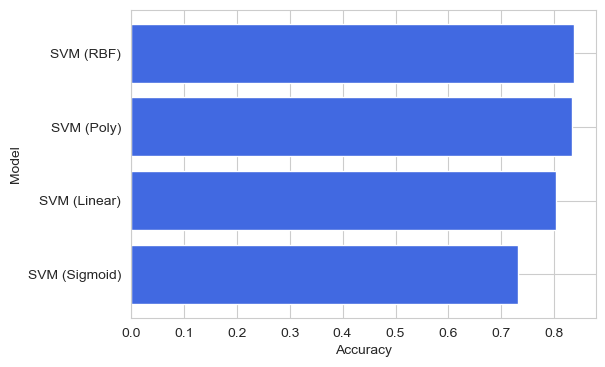

In [15]:
plt.figure(figsize=(6, 4))
x_plot = [x for y, x in sorted(zip(results_list.values(), results_list.keys()))]
y_plot = [y for y, x in sorted(zip(results_list.values(), results_list.keys()))]
x_pos = [i for i, _ in enumerate(x_plot)]

plt.barh(x_pos, y_plot, color="royalblue")
plt.ylabel("Model")
plt.xlabel("Accuracy")

plt.yticks(x_pos, x_plot)
plt.show()

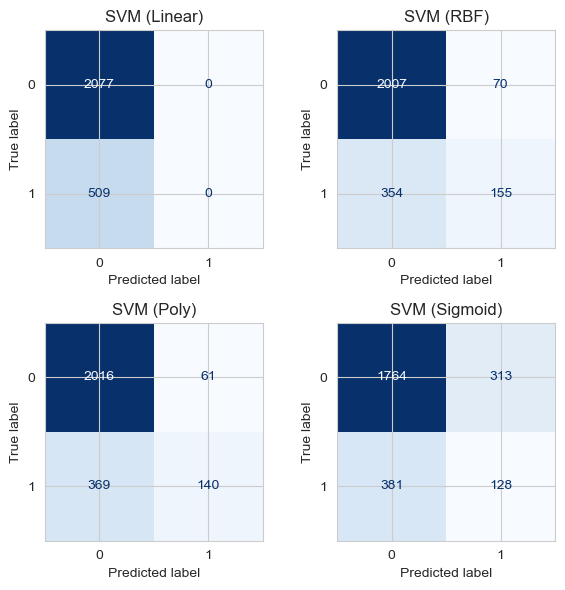

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Flatten the 2x2 array of axes into a 1D array for easier indexing
axes = axes.flatten()

# Loop through each model and its predictions
for index, algo in enumerate(model_list.keys()):
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        predictions_list[algo],
        ax=axes[index],  # Use the flattened index to access the correct subplot
        cmap="Blues",
        colorbar=False,
    )
    axes[index].set_title(algo)  # Set each subplot title to the model name

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_fold = 5
results_cv = {}
for algo in model_list.keys():
    print(algo)
    results_cv[algo] = np.mean(cross_val_score(model_list[algo], x, y, cv=k_fold))

SVM (Linear)
SVM (RBF)
SVM (Poly)
SVM (Sigmoid)


In [20]:
results_cv

{'SVM (Linear)': 0.8033421208268384,
 'SVM (RBF)': 0.8158732781181834,
 'SVM (Poly)': 0.8151007209575735,
 'SVM (Sigmoid)': 0.7388346155411731}

<IPython.core.display.Javascript object>

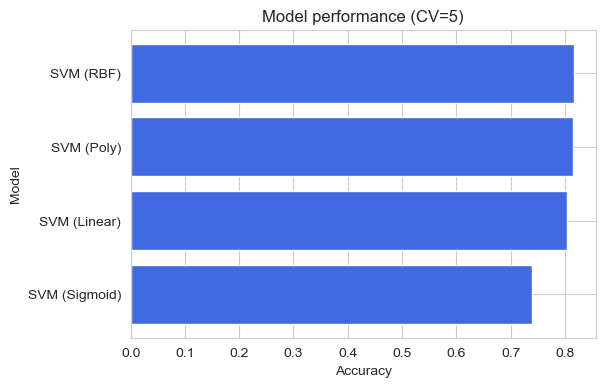

In [18]:
plt.figure(figsize=(6, 4))

x_plot = [x for y, x in sorted(zip(results_cv.values(), results_cv.keys()))]
y_plot = [y for y, x in sorted(zip(results_cv.values(), results_cv.keys()))]
x_pos = [i for i, _ in enumerate(x_plot)]

plt.barh(x_pos, y_plot, color="royalblue")
plt.ylabel("Model")
plt.xlabel("Accuracy")
plt.title("Model performance (CV=5)")

plt.yticks(x_pos, x_plot)
plt.show()